# Wk3:Classifying Iris Flowers 

# Dataset Features
Source: UCI Machine Learning Repository.
Size:5.1 KB
Row:151

columns: 6; ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm','Species']

# Problem defination:
As a data scientist working for a botanical research institute, tasked to develop a machine learning model that can accurately classify species of Iris flowers based on their physical characteristics. The model should help botanists quickly identify species in the field, aiding in research and conservation efforts.

# Objective: 
Build a machine learning model to classify Iris flowers into three species: Iris Setosa, Iris Versicolor, and Iris Virginica. The dataset provides features like sepal and petal length/width for each flower.

# Steps:

Data Preparation:Use Python libraries like Pandas to import and explore the data.

Model Building: Build and train the model on the prepared data.

Model Evaluation: Use a confusion matrix to assess model performance.

# 1: Data Preparation

Import Necessary libraries

In [48]:
import warnings
warnings.filterwarnings('ignore')

#First,install all dependancies needed then import the necessary libraries for the task 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

# Load Data

In [49]:
#Load the data provided ->Dataset (Iris_Data)
Iris_data= pd.read_csv(r'C:/Users/Christiana/Desktop/BYCT-Data Science Challenge/Iris.csv')
Iris_data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [50]:
#Get basic information about the data,to help understand your datatset and dataypes
Iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [51]:
Iris_data.describe() # Numerical description of the data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [52]:
Iris_data.columns #viewing your column names

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# Handling Missing Values

- Checking for duplicates

- Check and Replace missing values

In [53]:
#Check for missing values
Missing_values = Iris_data.isnull()
Missing_values.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [54]:
Missing_values = Iris_data.isnull().sum().sum() #  check the total number of missing values in the dataset, result is 0 mising values
print(f'The total number of missing values in the dataset is {Missing_values}, missing values.')

The total number of missing values in the dataset is 0, missing values.


In [55]:
#Check for duplicate values
Iris_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

# Learnt a new visualization technique from the Seaborn Lib using FacetGrid
FACETGRID FEATURE:FacetGrid class is a multi-plot grid for plotting conditional relationships.it helps in visualizing distribution of one variable as well as the relationship between multiple variables separately within subsets of your dataset using multiple panels (i.e Allows drawing multiple instances of the same plot(Target varible) on different subsets of your dataset at the same time).

In [56]:
Iris_data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

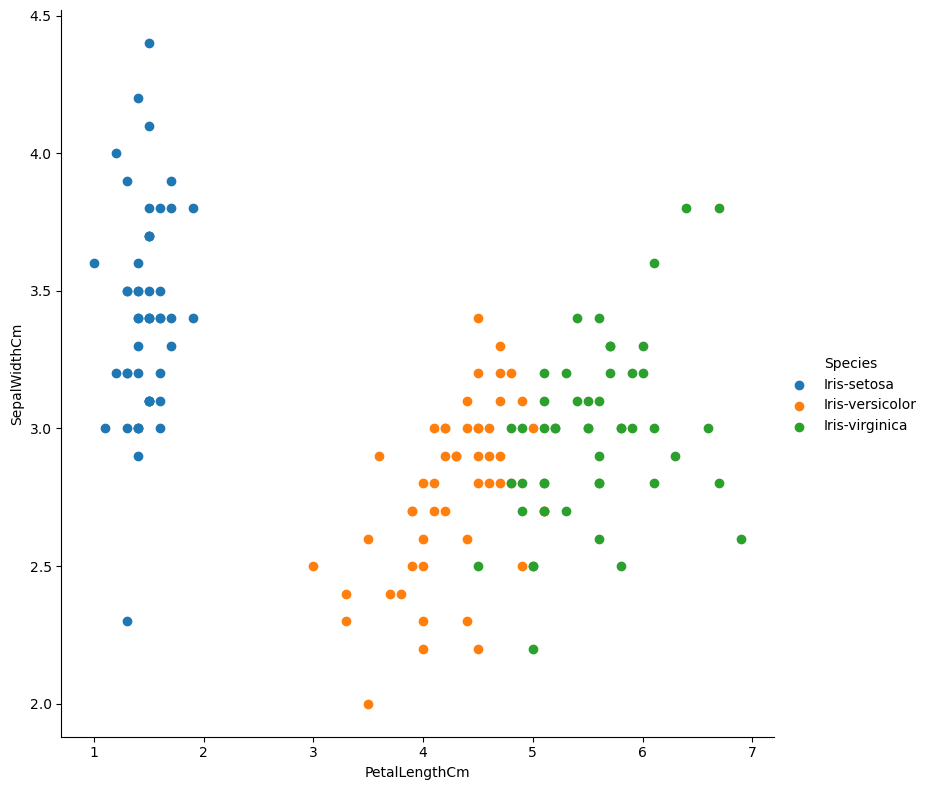

In [93]:
ax= sns.FacetGrid(Iris_data,hue='Species',height=8).map(plt.scatter,'PetalLengthCm','SepalWidthCm').add_legend()

# Separate the data into features (sepal/petal length/width) and target variable (flower species).

Separating data into features and target variables is a crucial step in the data preprocessing phase of machine learning.

Features (Input Variables): These are the independent variables or predictors used to predict the target variable. They are usually represented by 
𝑋
X.

Target Variable (Output Variable): This is the dependent variable or the outcome you are trying to predict. It is usually represented by 
𝑦
y.

AIM: By separating the data into features and target variables, you can easily integrate 
𝑋,X and 𝑦,y to train the machine learning model.

Steps: 
Using the DataFrame indexing to separate the features and target. 

- Identify the Features and Target: Determine which columns are features and which one is the target. (Domainknowledge)

- Extract Features and Target: Extract the features into a separate variable 
𝑋
X and the target into another variable 
𝑦
y.

In [58]:
#Separate features (X) and target (y)
X = Iris_data[['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',]]
Y = Iris_data['Species']
print(X,Y)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      1            5.1           3.5            1.4           0.2
1      2            4.9           3.0            1.4           0.2
2      3            4.7           3.2            1.3           0.2
3      4            4.6           3.1            1.5           0.2
4      5            5.0           3.6            1.4           0.2
..   ...            ...           ...            ...           ...
145  146            6.7           3.0            5.2           2.3
146  147            6.3           2.5            5.0           1.9
147  148            6.5           3.0            5.2           2.0
148  149            6.2           3.4            5.4           2.3
149  150            5.9           3.0            5.1           1.8

[150 rows x 5 columns] 0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virgin

# Normalization/Standaradization

There are a couple of standardization technique suitable for every usecase.

- Min-Max Scaling: Scales the data to a fixed range, typically [0,1] or [-1,1]. used t0 ensure that all features are on the same scale without distorting differences in the range of values. e.g when a feature ranges from 10- 100, min-max scaling will transform it to range from 0-1.

Also used to ensure that each feature contributes equally to the distance calculations in algorithms like k-Nearest Neighbors (k-NN) and to improve the convergence of gradient-based optimization algorithms.


- Z-score normalization: centers the data around the mean with a unit standard deviation. useful when the data follows a normal distribution.Also used in algorithms that assume the data is centered around zero (e.g PCA,Linear Reg).
e.g if a feature has a mean of 50 and a standard deviation of 10, standaraization will transform the value of 60 to 1.(i.e (60-50)/10 = 1)

# Min-Max Scaling

In [59]:
#importing the MinMaxScaler from the Sklearn processinglibrary to perform the normalization process.
from sklearn.preprocessing import MinMaxScaler

In [60]:
# Min-Max Scaling
min_max_scaler = MinMaxScaler()# Initialize the Min-Max Scaler
data_min_max_scaled = min_max_scaler.fit_transform(X)# Fit the scaler to the data and transform it, for the X features to be within the range of [0,1]
print("Min-Max Scaled Data:\n", data_min_max_scaled)


Min-Max Scaled Data:
 [[0.         0.22222222 0.625      0.06779661 0.04166667]
 [0.00671141 0.16666667 0.41666667 0.06779661 0.04166667]
 [0.01342282 0.11111111 0.5        0.05084746 0.04166667]
 [0.02013423 0.08333333 0.45833333 0.08474576 0.04166667]
 [0.02684564 0.19444444 0.66666667 0.06779661 0.04166667]
 [0.03355705 0.30555556 0.79166667 0.11864407 0.125     ]
 [0.04026846 0.08333333 0.58333333 0.06779661 0.08333333]
 [0.04697987 0.19444444 0.58333333 0.08474576 0.04166667]
 [0.05369128 0.02777778 0.375      0.06779661 0.04166667]
 [0.06040268 0.16666667 0.45833333 0.08474576 0.        ]
 [0.06711409 0.30555556 0.70833333 0.08474576 0.04166667]
 [0.0738255  0.13888889 0.58333333 0.10169492 0.04166667]
 [0.08053691 0.13888889 0.41666667 0.06779661 0.        ]
 [0.08724832 0.         0.41666667 0.01694915 0.        ]
 [0.09395973 0.41666667 0.83333333 0.03389831 0.04166667]
 [0.10067114 0.38888889 1.         0.08474576 0.125     ]
 [0.10738255 0.30555556 0.79166667 0.05084746 0.12

In [61]:
Y.ndim #Before Preprocessing, always check your array dimension to avoid errors

1

# Preprocessing -OneHotEncoder for the Target variable(string values)

OneHotEncoder: it's a common practice to encode these string values(categorical target variables) into numerical values that machine learning algorithms can work with(i.e Encoding String values to binary values). 

#Why One-Hot Encode? 
Because:

- It converts categorical data into a format that can be provided to machine learning algorithms to improve predictions.
- It avoids the issue of ordinal relationships being inferred from numerical labels.

In [62]:
from  sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [63]:
Y= Iris_data['Species'].values.reshape(-1,1)# Reshape to 2D array
Y

array([['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-se

In [64]:
# Creating an instance of the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

In [65]:
#Preprocessing: converting the categorical data into a format that is understood by machine learning algorithms to improve predictions
Y_test= encoder.fit_transform(Y) # Fit and transform the target variable

print(Y_test[:150])

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

# Model Building -Logistic Regression 
Logistic Regression: is a supervised machine learning algorithm widely used for binary classification tasks such as identifying whether an email is spam or not, diagnosing diseases by assessing the presence or absence of specific conditions based on patient test results.

In Logistic regression, instead of fitting a regression line, we fit an “S” shaped logistic function, which predicts two maximum values (0 or 1).

- The S-form curve is called the Sigmoid function or the logistic function.
- In logistic regression, we use the concept of the threshold value (0.5), which defines the probability of either 0 or 1. Such as values above the threshold value tends to 1, and a value below the threshold values tends to 0.

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

# Train/Test dataset
Splitting my dataset into train and test set

In [67]:
# splitting X and Y into training and testing sets
X_train, X_test,Y_train, Y_test = train_test_split(X, Y,  test_size=0.4,random_state=1)
print('Train set:',X_train.shape,Y_train.shape)
print('Test set:',X_test.shape,Y_test.shape)

Train set: (90, 5) (90, 1)
Test set: (60, 5) (60, 1)


In [68]:
# create logistic regression object, train the model using the training sets
LR=LogisticRegression(C=0.01,solver='sag').fit(X_train,Y_train)
LR


LogisticRegression(C=0.01, solver='sag')

In [69]:
yhat=LR.predict(X_test)
yhat

array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',


In [70]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.82918905, 0.14646988, 0.02434106],
       [0.02281004, 0.26926283, 0.70792713],
       [0.14663186, 0.52188287, 0.33148527],
       [0.79225481, 0.1735353 , 0.03420989],
       [0.01283651, 0.34493053, 0.64223296],
       [0.30328387, 0.51633217, 0.18038397],
       [0.00353146, 0.18524242, 0.81122612],
       [0.45807562, 0.36383045, 0.17809393],
       [0.5773675 , 0.30829598, 0.11433652],
       [0.01387408, 0.32694362, 0.6591823 ],
       [0.03649754, 0.3638404 , 0.59966206],
       [0.85698403, 0.1265413 , 0.01647468],
       [0.03986562, 0.46816293, 0.49197144],
       [0.36094745, 0.4915445 , 0.14750805],
       [0.10309128, 0.49161947, 0.40528925],
       [0.39667793, 0.36720537, 0.2361167 ],
       [0.04317999, 0.38029789, 0.57652211],
       [0.16513552, 0.51468513, 0.32017935],
       [0.6159972 , 0.29018661, 0.09381618],
       [0.53343341, 0.32433069, 0.1422359 ],
       [0.04285224, 0.38925386, 0.5678939 ],
       [0.06409643, 0.42962238, 0.5062812 ],
       [0.

In [71]:
from sklearn.metrics import classification_report

In [72]:
print(classification_report(Y_test,yhat))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.95      0.97        19
Iris-versicolor       0.93      0.62      0.74        21
 Iris-virginica       0.71      1.00      0.83        20

       accuracy                           0.85        60
      macro avg       0.88      0.86      0.85        60
   weighted avg       0.88      0.85      0.85        60



In [73]:
print("Logistic Regression model accuracy(in %):",
      metrics.accuracy_score(Y_test, yhat)*100)

Logistic Regression model accuracy(in %): 85.0


# Setting up the Decision Tree

In [108]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

In [118]:
# Initialize the decision tree classifier
Iris_tree= DecisionTreeClassifier(criterion="entropy",max_depth=4)
Iris_tree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [119]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [120]:
Iris_tree.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

# prediction

In [121]:
predTree = Iris_tree.predict(X_test)

In [122]:
#print(predTree[0:5])
print(Y_test[0:15])

[['Iris-setosa']
 ['Iris-versicolor']
 ['Iris-versicolor']
 ['Iris-setosa']
 ['Iris-virginica']
 ['Iris-versicolor']
 ['Iris-virginica']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-virginica']
 ['Iris-versicolor']
 ['Iris-setosa']
 ['Iris-virginica']
 ['Iris-versicolor']
 ['Iris-versicolor']]


In [123]:
# Print the classification report
print(classification_report(Y_test,predTree))

# Calculate the accuracy
accuracy = accuracy_score(Y_test, predTree)
print(f'Accuracy: {accuracy}')

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

Accuracy: 0.9777777777777777


In [124]:
# Predict on the training set
predTree_train = Iris_tree.predict(X_train)

# Calculate training set accuracy.
train_accuracy = accuracy_score(Y_train, predTree_train)
print(f'Training accuracy: {train_accuracy}')

# Calculate test set accuracy.
test_accuracy = accuracy_score(Y_test, predTree)
print(f'Test accuracy: {test_accuracy}')

Training accuracy: 1.0
Test accuracy: 0.9777777777777777


In [125]:
# Print the classification report
print(classification_report(Y_test, predTree))

# Calculate the accuracy
accuracy = accuracy_score(Y_test, predTree)
print(f'Accuracy: {accuracy}')

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

Accuracy: 0.9777777777777777


# Simplest way- DecisionTreeClassifier 

In [116]:
model=DecisionTreeClassifier()

model.fit(X,Y)
print(model)

DecisionTreeClassifier()


In [117]:
model.score(X,Y)

1.0

In [128]:
expected=Y
predicted=model.predict(X)

print(metrics.classification_report(expected,predicted))
print(metrics.confusion_matrix(expected,predicted))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       1.00      1.00      1.00        50
 Iris-virginica       1.00      1.00      1.00        50

       accuracy                           1.00       150
      macro avg       1.00      1.00      1.00       150
   weighted avg       1.00      1.00      1.00       150

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]



#  Model Evaluation

A confusion matrix is a table that allows you to visualize the performance of a classification algorithm. It compares the actual target values with the values predicted by the model.

In [104]:
#Import Sklearn.metrics library for confusion matrix and model accuracy score. 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

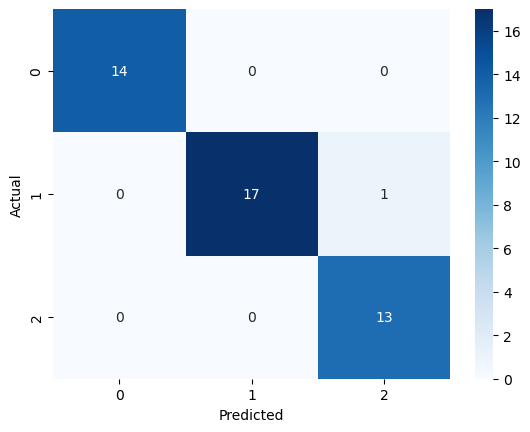

In [105]:
# predTree are predicted labels and Y_test is your true labels
conf_matrix = confusion_matrix(Y_test, predTree)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(conf_matrix.shape[1]), yticklabels=range(conf_matrix.shape[0]))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [130]:
# Algorithm to check if the model works according with user input
print("Please enter the following information to make a prediction:")
sepal_length = float(input("Sepal length (cm): "))
sepal_width = float(input("Sepal width (cm): "))
petal_length = float(input("Petal length (cm): "))
petal_width = float(input("Petal width (cm): "))

user_input = np.array([[sepal_length, sepal_width, petal_length, petal_width]])

# Make the prediction
predicted = Iris_tree.predict(user_input)

# Output the prediction
#target_names = Y_test
#predicted_class = target_names[predTree[0]]
# Output the prediction
print("Predicted class:", prediction[0])

print(f"The predicted class is: {predicted_class}")

Please enter the following information to make a prediction:
Sepal length (cm): 5.1
Sepal width (cm): 3.5
Petal length (cm): 1.4
Petal width (cm): 0.2


ValueError: X has 4 features, but DecisionTreeClassifier is expecting 5 features as input.